In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing the non-stationary data
df1 = pd.read_csv('data/airline_passengers.csv',index_col='Month',parse_dates=True)

In [4]:
df1.index.freq = 'MS'

In [5]:
# importing the stationary data
df2 = pd.read_csv('data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)

In [6]:
df2.index.freq = 'D'

In [8]:
df1.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [9]:
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


<AxesSubplot:xlabel='Month'>

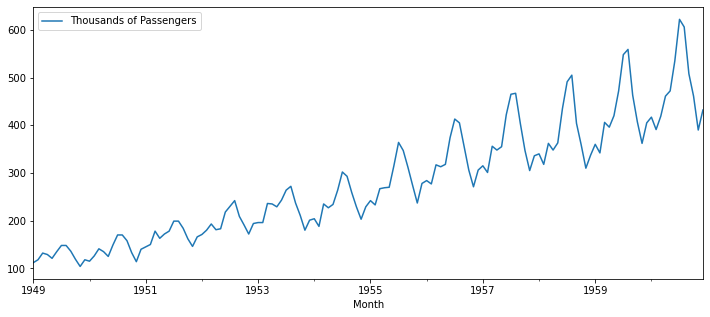

In [10]:
df1.plot(figsize=(12,5))

<AxesSubplot:xlabel='Date'>

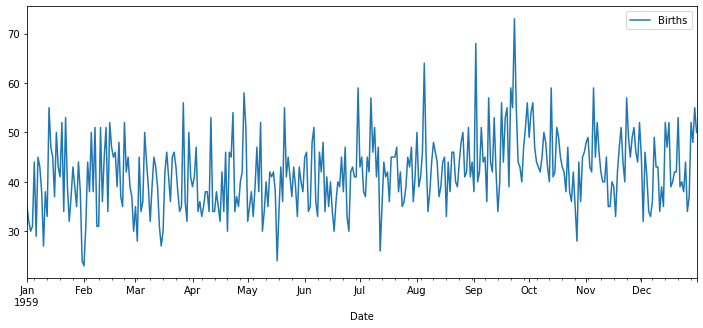

In [11]:
df2.plot(figsize=(12,5))

In [7]:
# importing pyramind arima library
from pmdarima import auto_arima

In [12]:
auto_arima(df2['Births'])

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [13]:
fitted_model = auto_arima(df2['Births'],
                         start_p=0,max_p=5,
                         start_q=0,max_q=5,
                         start_d=0,max_d=5,
                         seasonal=False,trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2650.760, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2565.234, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2463.584, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2648.768, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2460.154, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2461.271, Time=0.26 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2460.722, Time=0.21 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2536.154, Time=0.17 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2462.992, Time=0.81 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2459.074, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2462.221, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2563.261, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2460.367, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

**So for the df1, model should have following variables:**
1. p = 1
2. d = 1
3. q = 1

In [14]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1226.537
Date:                Mon, 02 May 2022   AIC                           2459.074
Time:                        22:46:27   BIC                           2470.766
Sample:                             0   HQIC                          2463.721
                                - 365                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1252      0.060      2.097      0.036       0.008       0.242
ma.L1         -0.9624      0.017    -56.429      0.000      -0.996      -0.929
sigma2        49.1512      3.250     15.122      0.000      42.781      55.522
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                25.33
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.57
Prob(H) (two-sided):                  0.81   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
fiited_model2 = auto_arima(df1['Thousands of Passengers'],
                          start_p=0,max_p=5,
                          start_q=0,max_q=5,
                          start_d=0,max_d=5,
                          seasonal=True,m=12,
                          trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=0.17 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.00 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.12 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.18 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.51 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.28 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.13 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.23 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.34 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.20 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.13 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=1.56 sec
 ARIMA(0,1,1)(1,1,1)[12]     

**So for df2, arima model should have following variable values:**
1. p = 0
2. d = 1
3. q = 1
4. P = 2
5. D = 1
6. Q = 0